In [1]:
# Add all necessary imports here
import numpy as np
import re
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from IPython.display import IFrame
%matplotlib inline
plt.style.reload_library()
plt.style.use("seaborn-dark-palette")

import warnings
warnings.filterwarnings('ignore')

<image class='rise-cover'>
<section class='rise-cover'>
<h1>Analytics für Entwickler</h1>
    <h3>und alle anderen</h3>
<p></p>
<p>&nbsp;</p>
<p>&nbsp;</p>
Sebastian Schulthess<p>
Professional Software Developer<p>
8.1.2019
</section>
</image>

## Agenda

- Was ist Machine Learning
- Wie funktioniert Machine Learning (Anwendung)


![https://www.anexas.net/sites/default/files/aaaaaaa_8_162.jpg](ai.jpg "AI Übersicht")

![http://www.machinedlearnings.com/2014/08/more-deep-learning-musings.html](godeeper.jpg "Go deeper")

![https://medium.freecodecamp.org/the-incomplete-deep-learning-guide-2cc510cb23ee](gpu.png "GPU")

## Deep Learning Beispiele

In [2]:
IFrame('https://zaidalyafeai.github.io/pix2pix/cats.html', width=1200, height=800)

## Deep Learning Beispiele

In [3]:
IFrame('https://www.deepl.com/translator', width=1200, height=800)  

## Machine Learning Definition

> Machine learning (ML) is a category of algorithm that allows software applications to become more accurate in predicting outcomes without being explicitly programmed. The basic premise of machine learning is to build algorithms that can receive input data and use statistical analysis to **predict** an output while updating outputs as **new data** becomes available.

*source: https://searchenterpriseai.techtarget.com/definition/machine-learning-ML*

## Was sind die beiden Hauptkategorien von Machine Learning?


### Supervised learning: Vorhersage machen
Ziel: Für einen neuen Datensatz eine Vorhersage (Zuteilung oder Wert) machen.
* Zuteilung = Klassifikation, Wert = Regression

### Unsupervised learning: Strukturieren der Daten
Ziel: Eine Struktur innerhalb der Daten extrahieren
* Es gibt keine "richtige Antwort"

![https://blog.westerndigital.com/machine-learning-pipeline-object-storage/](learning.jpg "Learning")

## Dieses Supervised Learning klingt gut, wie kann ich loslegen?

* Daten
* Fragestellung anhand der Daten
* Entwicklungsumgebung 

In [4]:
print('python') 

python


![scikit-learn logo](02_sklearn_logo.png)
![Jupyter logo](02_jupyter_logo.svg)

### Titanic Datensatz

In [5]:
df_titanic  = pandas.read_excel('titanic.xls', 'titanic3', index_col=None, na_values=['NA'])
print(df_titanic.columns.values)

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest']


### Was bedeuten die einzelnen Spalten?

- survival: Survival (0 = no; 1 = yes)
- class: Passenger class (1 = first; 2 = second; 3 = third)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat (if survived)
- body: Body number (if did not survive and body was recovered)

In [6]:
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Machine Learning Begriffe

- Jede Zeile ist eine **observation** (auch genannt: sample, example, instance, record)
- Jede Spalte ist ein **feature** (auch genannt: predictor, attribute, independent variable, input, regressor, covariate)
- Der gesuchte Wert ist die **response** (also known as: target, outcome, label, dependent variable)
- **Klassifikation** wenn die response kategorial ist
- **Regression** wenn die response ein numerischer Wert ist

## Jetzt sind wir bereit fürs Modellieren
- Modeling findet im Zusammenspiel mit Data Preperation statt.
- Die Güte des Modells wird mit einer Evaluation gemessen.
- Die meiste Zeit muss in Data Preparation invesiert werden.

![https://statistik-dresden.de/archives/1128](crisp.png)

In [7]:
df_titanic.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


### Daten visualisieren

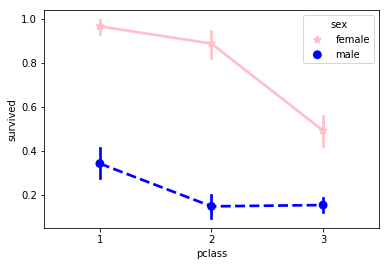

In [8]:
import seaborn as sns
sns.pointplot(x="pclass", y="survived", hue="sex", data=df_titanic,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

### Data preparation

In [9]:
# remove some features, for now.
processed_df = df_titanic.drop(['name','ticket','home.dest','embarked', 'sex', 'cabin', 'boat', 'body'], axis=1)
processed_df = processed_df.dropna()


# store feature matrix in "X"
X = processed_df.drop(['survived'], axis=1).values

# store response vector in "y"
y = processed_df['survived'].values


print(X.shape)
print(y.shape)

(1045, 5)
(1045,)


## scikit-learn 4-step modeling pattern

**Schritt 1:** Gewünschte Klass importieren

In [10]:
from sklearn.tree import DecisionTreeClassifier

**Schritt 2:** Instanziieren eines "estimator"

- "Estimator" ist scikit-learn's Bezeichnung für Modell

In [11]:
dt = DecisionTreeClassifier()

**Schritt 3:** Fitten des Models mit den Daten (aka "model training")

In [12]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Schritt 4:** Vorhersagen der response für eine neue Observation

- Neue Observationen sind genannt "out-of-sample" data

In [13]:
## Hätte ich als Schnäppchenjäger überlebt?
## Liste mit Werten: Ticketklasse, Alter, Eltern, Kinder, Ticketpreis
print(dt.predict([[2, 32, 0,0, 99]]))

## Ein Upgrade gekriegt?
print(dt.predict([[1, 32, 0,0, 99]]))

[0]
[1]


### Doch, wie genau ist diese Aussage?

- Wie korrekt kann das Modell eine Vorhersage machen?
- Wie lassen sich unterschiedliche Modelle mit einander vergleichen?
- Wäre es nicht wichtig, das Geschlecht auch mit zu beachten?

- Evaluation - Data preparation - Data modeling

## Evaluation

- Trainieren des Modells auf allen Daten
- Testen des Modells auf den gleichen Daten und prüfen, ob die Vorhersagen stimmen.
- Training accuracy genannt

In [14]:
from sklearn import metrics

## Vorhersage speichern
y_pred = dt.predict(X)
## Vergleichen
print(metrics.accuracy_score(y, y_pred))

0.9636363636363636


## Probleme dieses Ansatzes?
- Ziel ist es die Performance auf **out-of-sample data** zu messen
- Aber, eine hohe training accuracy führt zu **overly complex models**, welche nicht gut generalisieren können
- Unnötig komplexe Modelle **overfitten** die Trainings Daten.

![https://medium.com/@srjoglekar246/overfitting-and-human-behavior-5186df1e7d19](overfitting.png)

## Lösung: Aufteilen der Daten in Test und Training

1. Split der Daten in zwei Teile: ein **training set** und ein **testing set**
2. Trainieren des Modells auf dem **training set**
3. Testen des Modells auf dem **testing set**

### Evaluation

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5992366412213741


In [17]:
# Was wäre die accuracy, wenn immmer "not survived" gewählt wird?

max(y.mean(), 1 - y.mean())

0.5913875598086125

- Unser Modell ist also erheblich schlechter auf "ungesehenen Daten". 
- Wir haben aber auch jede menge Features entfernt. 

## Ein paar Gedanken zu train/test split

- Je nach Aufteilung des split's wird ein grosser Teil der Daten nicht verwendet. 
- **K-fold cross-validation** eliminiert dieses Problem.
- Aber, train/test split ist trotzdem nützlich durch seine **Flexibilität und Geschwindigkeit**

## Wie funktioniert cross-validation?
1. Splitten der Daten in K **gleiche** Partitionen (oder "folds").
2. Benütze den ersten fold als **testing set** and alle restlichen als **training set**.
3. Berechne **testing accuracy**.
4. Wiederhole die Schritte 2 und 3 K-Mal, immer mit einem anderen fold.
5. Der Durchschnitt aller ergibt die **average testing accuracy**. 

**5-fold cross-validation:**

![5-fold cross-validation](cross_validation.png)

### cross-validation

In [18]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print(scores)

[0.48571429 0.59047619 0.55238095 0.53333333 0.60952381 0.61904762
 0.56190476 0.55769231 0.53398058 0.61165049]


In [19]:
print(scores,res.mean())

0.5655704328034427


## Zurück zu Data preparation
- Das Modell ist nur knapp besser als eine Münze zu werfen. 
- Wir haben wichtige Features weggelassen (Alter und Geschlecht).

In [20]:
# wir entfernen weiterhin einige features
processed_df = df_titanic.drop(['name','ticket','home.dest','embarked', 'cabin', 'boat', 'body'], axis=1)

# ganz simple, fehlende Age-Werte werden mit dem Durchschnitt ersetzt. 
processed_df['age'] = processed_df['age'].replace(np.nan, df_titanic['age'].mean(), regex=True)

# Unwandeln von Geschlecht in numerische Werte (0,1)
le = preprocessing.LabelEncoder()
processed_df.sex = le.fit_transform(processed_df.sex)

# Na- Werte droppen
processed_df = processed_df.dropna()

X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values
print(X.shape)
print(y.shape)

(1308, 6)
(1308,)


### Ansicht Beispieldaten

In [21]:
processed_df.sample(5)

,pclass,survived,sex,age,sibsp,parch,fare
820,3,1,1,9.000000,0,2,20.5250
538,2,1,1,30.000000,0,0,12.7375
410,2,0,1,29.881135,0,0,0.0000
600,3,0,1,42.000000,0,0,7.5500
371,2,1,0,45.000000,0,2,30.0000


### Evaluation

In [22]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.7147798003523194


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print(scores.mean()) 

0.7461009982384029


### Evaluation

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.7644744568408691


In [25]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation = 'relu', solver='lbfgs', hidden_layer_sizes=(150))
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.7492190252495596


### Welche Modelle gibt es sonst noch? 
### ... und welche davon soll ich testen?

- einige
- kommt drauf an

### scikit-learn Map

![ml_map](ml_map.png)

### Je nach Problem / Daten

![classifier_comparison](classifier_comparison.png)

### Liste durchprobieren

![classifier](classifier.png)

### Welcher nun?
- Data preparation 

### Weiterführende Themen:

- Modell Bewertungsmöglichkeiten: Precision and Recall, ROC 
- Grid-Search zum finden von optimalen Modellparametern
- Deploy: **Dabbawala Analytics Modul** - Modelle verwalten

### Kaggle Competitions

In [ ]:
IFrame('https://www.kaggle.com/c/titanic', width=1200, height=800)

### Wrap up

- Artificial Intelligence - Machine Learning - Deep Learning
- Supervised Learning (Classification, Regression) - Unsupervised Learning (Clustering)
- python - scikit-learn - jupyter notebooks (https://github.com/bravenoob/machine-learning)
- CRISP-DM
- Training set, testing set, overfitting, underfitting, cross-validation 
- Dabbawala Analytics Modul [Link Wiki](https://confluence.bedag.ch/display/DAB/Analytics+Modul)
- Analytics Komitee [Link Wiki](https://confluence.se.bedag.ch/display/BDS/SE+Analytics)

### Fragen?